# Retour sur l'ACP

Pour ce notebook de reprise, nous allons reparler de l'ACP, que vous avez normalement abordé en L2.

Nous utilisons le module [`scikit-learn`](http://scikit-learn.org/), dédié au *Machine Learning*, dont nous reparlerons dans d'autres cours de l'année L3. 

Pour l'utiliser, nous importons les éléments un par un lorsqu'on en a besoin. Et nous allons aussi utiliser d'autres modules, que nous importons ci-dessous.

In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline

Nous allons réaliser une étude de cas, avec les données [`WGI`](https://fxjollois.github.io/cours-2019-2020/m1--add-massives/WGI_Data.csv) de la Banque mondiale. Celles-ci donnent certains indicateurs sur la gouvernance des pays (plus d'infos sur [cette page](http://info.worldbank.org/governance/wgi/#home)). Voici donc le code pour les importer dans un data frame `pandas`, et leur aperçu. Pour information, plus la valeur est haute, meilleur est le pays sur cet indicateur (et inversement).

In [2]:
# le dropna() permet de supprimer les pays pour lesquels il manque des informations
WGI_complet = pandas.read_csv("WGI.csv").dropna()
WGI_complet

Country Continent  CorruptionControl  GovEffectiveness  \
0           Afghanistan      Asia          -1.563735         -1.222106   
1               Albania    Europe          -0.397567         -0.000573   
2               Algeria    Africa          -0.691359         -0.544695   
4               Andorra    Europe           1.230341          1.860201   
5                Angola    Africa          -1.411829         -1.039377   
..                  ...       ...                ...               ...   
204             Vietnam      Asia          -0.396315          0.010342   
206  West Bank and Gaza      Asia          -0.151860         -0.618906   
207         Yemen, Rep.      Asia          -1.668297         -1.819497   
208              Zambia    Africa          -0.396116         -0.658354   
209            Zimbabwe    Africa          -1.281971         -1.159108   

     PoliticalStability  RegulatoryQuality   RuleLaw  VoiceAccountability  
0             -2.749167          -1.327919 -1.616430            -1.086220  
1              0.257720           0.188962 -0.347468             0.159191  
2             -1.139282          -1.171843 -0.849319            -0.877241  
4              1.396047           0.871409  1.564011             1.197540  
5             -0.386640          -1.001381 -1.080522            -1.167355  
..                  ...                ...       ...                  ...  
204            0.168574          -0.453935  0.048006            -1.407117  
206           -2.097847           0.064761 -0.306334            -1.169161  
207           -2.793776          -1.479933 -1.600989            -1.651756  
208            0.183082          -0.483631 -0.302031            -0.300023  
209           -0.612713          -1.720111 -1.323667            -1.113374  

[201 rows x 8 columns]

## ACP

Dans le sous-module `decomposition`, nous allons importer la fonction [`PCA()`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Le fonctionnement de celle-ci est similaire à toutes les autres dans `scikit-learn`. 

1. On créé d'abord un objet (nommé ici `pca`) qui va contenir le résultat de l'ACP. Dans la fonction `PCA()`, on pourra aussi indiquer les paramètres tels que le nombre de composants à retenir (`n_components` - ici on garde tout).
2. Ensuite, on ajuste (*fit*  en anglais) sur des données avec la fonction `fit()` de l'objet précédemment créé. Dans cette fonction, nous devons donc passer les données à utiliser (variables uniquement quantitatives).

Si l'on souhaite une ACP normée (ce qui n'est pas le cas ici), il nous faut standardiser les données en amont, avec par exemple la fonction `scale()` du sous-module `preprocessing` (importée aussi ici). Bien évidemment, il ne faut passer que des variables quantitatives, sans données manquantes.

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# suppression des colonnes non numériques
WGI_num = WGI_complet.drop(columns = ["Country", "Continent"])
pca = PCA()
pca.fit(WGI_num)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Variance expliquée

L'objet `pca` comprend maintenant un certain nombre d'objets et de fonctions. Le premier objet est le tableau des variances expliquées (`explained_variance_` - proportionnelles aux valeurs propres) par chaque dimension, et le ratio (proportion) de variance expliquée par dimension (`explained_variance_ratio_`).

In [4]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.02734546 0.47250134 0.31926518 0.11493585 0.05219518 0.04079811]
[0.8341316  0.0783969  0.05297213 0.01907003 0.00866017 0.00676918]


Il est possible (et préférable) de faire un tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées. Voici un petit code permettant de faire ceci.

In [5]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0      Dim1            5.027345                  83.0                   83.0
1      Dim2            0.472501                   8.0                   91.0
2      Dim3            0.319265                   5.0                   97.0
3      Dim4            0.114936                   2.0                   98.0
4      Dim5            0.052195                   1.0                   99.0
5      Dim6            0.040798                   1.0                  100.0

L'idée est de représenter graphiquement ces proportions de variances expliquées (qu'on passe en pourcentage par convenance).

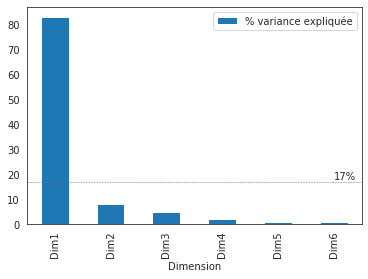

In [6]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "17%") # ajout de texte
plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

On remarque ici qu'avec seulement deux dimensions suffisent à expliquer 91 %  de la variance des données. 

Qu'en pensez-vous ?


### Représentation des individus

Nous allons maintenant calculer les coordonnées des pays selon les dimensions, avec la fonction `transform()` de l'objet `pca`.

In [7]:
WGI_pca = pca.transform(WGI_num)

Afin de manipuler plus facilement l'objet obtenu par la suite, nous allons créer un `DataFrame` `pandas` en ne prenant que les deux premières dimensions, ainsi que pays et continents.

In [8]:
# Transformation en DataFrame pandas
WGI_pca_df = pandas.DataFrame({
    "Dim1" : WGI_pca[:,0], 
    "Dim2" : WGI_pca[:,1],
    "Country" : WGI_complet["Country"],
    "Continent" : WGI_complet["Continent"]
})

# Résultat (premières lignes)
WGI_pca_df.head()

Dim1      Dim2      Country Continent
0  3.790973 -0.936333  Afghanistan      Asia
1  0.019583  0.287254      Albania    Europe
2  2.063085 -0.340833      Algeria    Africa
4 -3.385678  0.124952      Andorra    Europe
5  2.439518  0.228024       Angola    Africa

Il est maintenant possible de représenter les données sur le premier plan factoriel. Dans ce graphique, il est important de noter le pourcentage de variance expliquée.

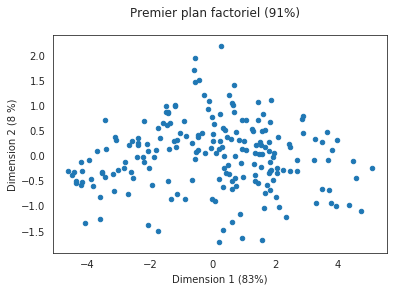

In [9]:
WGI_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (83%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (8 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (91%)") # titre général
plt.show()

Dans ce même graphique, on veut repérer les individus aux extrêmes. Ci-dessous, nous affichons donc les noms des pays ayant des valeurs absolues élevées pour chaque composante.

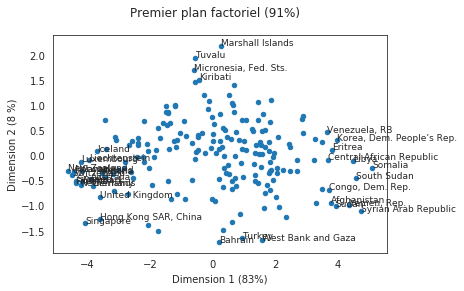

In [10]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
WGI_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in WGI_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["Country"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (83%)") 
plt.ylabel("Dimension 2 (8 %)")
plt.suptitle("Premier plan factoriel (91%)")
plt.show()

On pourrait aussi se demander s'il y a un *effet* continent. Pour cela, nous allons colorer les points en fonction de leur continent donc. 

In [11]:
# permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(WGI_pca_df["Continent"].drop_duplicates(), palette(range(6))))
couleurs

{'Asia': array([0.10588235, 0.61960784, 0.46666667, 1.        ]),
 'Europe': array([0.85098039, 0.37254902, 0.00784314, 1.        ]),
 'Africa': array([0.45882353, 0.43921569, 0.70196078, 1.        ]),
 'North America': array([0.90588235, 0.16078431, 0.54117647, 1.        ]),
 'South America': array([0.4       , 0.65098039, 0.11764706, 1.        ]),
 'Oceania': array([0.90196078, 0.67058824, 0.00784314, 1.        ])}

Une fois qu'on a associé une couleur à chaque continent, on peut utiliser ce dictionnaire comme ci-dessous

In [12]:
couleurs["Asia"]

array([0.10588235, 0.61960784, 0.46666667, 1.        ])

In [13]:
position = dict(zip(couleurs.keys(), range(6)))
position

{'Asia': 0,
 'Europe': 1,
 'Africa': 2,
 'North America': 3,
 'South America': 4,
 'Oceania': 5}

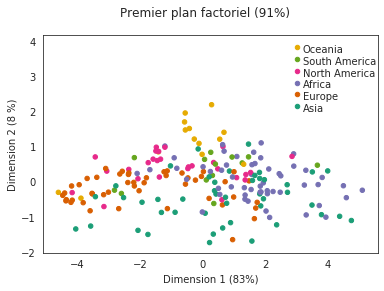

In [14]:
# Affichage des points avec une liste de couleurs
WGI_pca_df.plot.scatter(x = "Dim1", y = "Dim2", c = [couleurs[p] for p in WGI_pca_df["Continent"]])
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(3, position[cont] / 3 + 2.15, c = [coul], s = 20)
    plt.text(3.2, position[cont] / 3 + 2, cont)
plt.xlabel("Dimension 1 (83%)") 
plt.ylabel("Dimension 2 (8 %)")
plt.suptitle("Premier plan factoriel (91%)")
plt.show()

Il est aussi possible de différencier l'affichage de ce premier plan par continent.

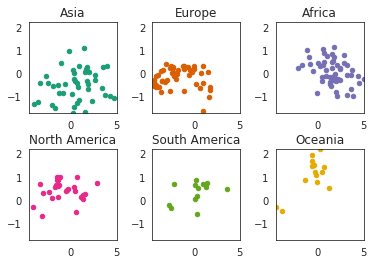

In [15]:
fig = plt.figure()
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for cont, coul in couleurs.items():
    ax = fig.add_subplot(2, 3, position[cont] + 1)
    temp = WGI_pca_df.query('Continent == "' + cont + '"')
    temp.plot.scatter(x = "Dim1", y = "Dim2", c = [coul], ax = ax)
    ax.set_title(cont)
    ax.set_xlim(WGI_pca_df.Dim1.quantile([0, 1])) # permet d'avoir min et max
    ax.set_ylim(WGI_pca_df.Dim2.quantile([0, 1])) # idem
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.show()


Que pensez-vous de ces observations ?

### Représentation des variables

Lorsqu'on réalise une ACP, surtout dans un contexte exploratoire (et non de compression), il est absolument nécessaire de décrire les axes à partir des variables, afin de comprendre ce qu'ils représentent. Pour cela, nous devons réaliser le *cercle des corrélations*. Malheureusement, il faut le réaliser *à la main*.

In [16]:
n = WGI_num.shape[0] # nb individus
p = WGI_num.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = numpy.sqrt(eigval) # racine carrée des valeurs propres
corvar = numpy.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pandas.DataFrame({'id': WGI_num.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

id     COR_1     COR_2
0    CorruptionControl -0.953077 -0.087238
1     GovEffectiveness -0.944814 -0.251061
2   PoliticalStability -0.821878  0.434985
3    RegulatoryQuality -0.939355 -0.251006
4              RuleLaw -0.977861 -0.108867
5  VoiceAccountability -0.828987  0.368022

Une fois ces coordonnées récupérées, on peut donc afficher ce cercle des corrélations comme ci-dessous.

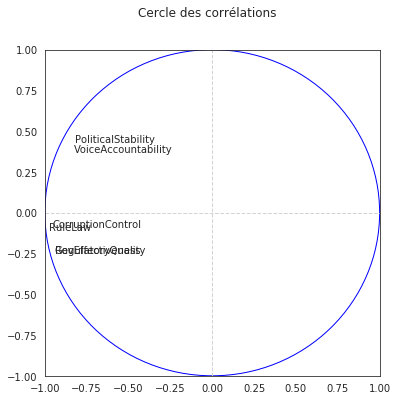

In [17]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

Ici, on va en déduire que l'axe 1 oppose à gauche les pays avec une forte valeur dans tous les indicateurs (ils sont tous à gauche), et à droite les pays à faible valeur pour ces indicateurs.

L'axe 2 semble opposer les pays avec une valeur positive pour les indicateurs sur la statibilité politique et la prise en compte de l'avis des citoyens en haut, avec les pays avec une valeur négative pour ces 2 indicateurs en bas. 

Vous pouvez revenir sur le graphique des pays pour mieux comprendre.

## Exercice

### Températures mondiales (anomalies)

Nous allons travailler ici sur les données de température mondiale HadCRUT4, fournies par [Climate Research Unit](https://crudata.uea.ac.uk/). Vous trouverez plus d’informations sur ces données sur ce [lien](https://crudata.uea.ac.uk/cru/data/temperature/). Nous avons ici plus exactement l'historique des anomalies moyennes mensuelles et annuelles depuis 1850, au niveau mondial, par rapport à la période de référence 1961-1990.

Le code ci-dessous télécharge directement les dernières données disponibles et les met dans un DataFrame dont vous avez un aperçu en dessous.

In [31]:
had = pandas.read_csv("https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT4-gl.dat", header=None)
donnees = pandas.DataFrame(
    [list(map(lambda v: float(v), filter(lambda v: v!= "", h.split(" ")))) for h in had[0][::2]],
    columns = ["Year", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Annual"]
)
donnees.tail()

Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
165  2015.0  0.705  0.689  0.708  0.673  0.711  0.743  0.697  0.740  0.796   
166  2016.0  0.934  1.111  1.106  0.937  0.707  0.744  0.744  0.790  0.729   
167  2017.0  0.739  0.845  0.873  0.737  0.659  0.641  0.651  0.714  0.557   
168  2018.0  0.554  0.528  0.615  0.627  0.587  0.573  0.594  0.586  0.598   
169  2019.0  0.738  0.662  0.874  0.780  0.610  0.708  0.706  0.719  0.713   

       Oct    Nov    Dec  Annual  
165  0.845  0.840  1.024   0.763  
166  0.598  0.553  0.620   0.797  
167  0.571  0.554  0.600   0.677  
168  0.678  0.590  0.638   0.597  
169  0.752  0.693  0.879   0.736

Vous devez donc réaliser les étapes suivantes, au propre dans un notebook :

- Décrire rapidement les données
    - Calculer les statistiques de base sur chaque mois et sur l'année
    - Réprésenter l'évolution des anomalies annuelles sur un graphique
- Réaliser une ACP sur les données mensuelles
- Produire les graphiques nécessaires à l’interprétation
- Identifier des années particulières
- Rechercher une partition intéressante des années
- Représenter cette partition sur le résultat de l'ACP
- Décrire les classes ainsi obtenues

Que peut-on dire globalement ?
